In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
df= pd.read_csv("Market_Basket_Optimisation.csv")
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.fillna('',axis=1,inplace=True)
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
1,chutney,,,,,,,,,,,,,,,,,,,
2,turkey,avocado,,,,,,,,,,,,,,,,,,
3,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
4,low fat yogurt,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,
7497,chicken,,,,,,,,,,,,,,,,,,,
7498,escalope,green tea,,,,,,,,,,,,,,,,,,


In [37]:
transacts = []
for i in range(0, 7500): 
  transacts.append([str(df.values[i,j]) for j in range(0, 20)])
transacts

[['burgers',
  'meatballs',
  'eggs',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['chutney',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['turkey',
  'avocado',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['low fat yogurt',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['whole wheat pasta',
  'french fries',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['soup',
  'light cream',
  'shallot',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '

In [38]:
te = TransactionEncoder()
tearr = te.fit(transacts).transform(transacts)
df = pd.DataFrame(tearr,columns=te.columns_)
df.dropna(axis=1,inplace=True)
df

,,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
support=apriori(df, min_support=0.03, use_colnames= True)
support

,support,itemsets
0,1.000000,()
1,0.033200,(avocado)
2,0.033733,(brownies)
3,0.087200,(burgers)
4,0.030133,(butter)
...,...,...
104,0.039200,"(, ground beef, spaghetti)"
105,0.048000,"(, mineral water, milk)"
106,0.035467,"(, spaghetti, milk)"
107,0.033733,"(, pancakes, mineral water)"


In [45]:
confidence=association_rules(support,metric="confidence",min_threshold=0.15)
confidence.sort_values(by=["lift"], inplace = True)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,(french fries),"(, mineral water)",0.170933,0.238267,0.033733,0.197348,0.828265,-0.006994,0.949021
118,"(, french fries)",(mineral water),0.170933,0.238267,0.033733,0.197348,0.828265,-0.006994,0.949021
59,(french fries),(mineral water),0.170933,0.238267,0.033733,0.197348,0.828265,-0.006994,0.949021
126,(green tea),"(, mineral water)",0.132000,0.238267,0.030933,0.234343,0.983534,-0.000518,0.994876
61,(green tea),(mineral water),0.132000,0.238267,0.030933,0.234343,0.983534,-0.000518,0.994876
...,...,...,...,...,...,...,...,...,...
133,"(, spaghetti)",(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,0.022088,1.163699
132,"(, ground beef)",(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959
65,(spaghetti),(ground beef),0.174133,0.098267,0.039200,0.225115,2.290857,0.022088,1.163699
64,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959


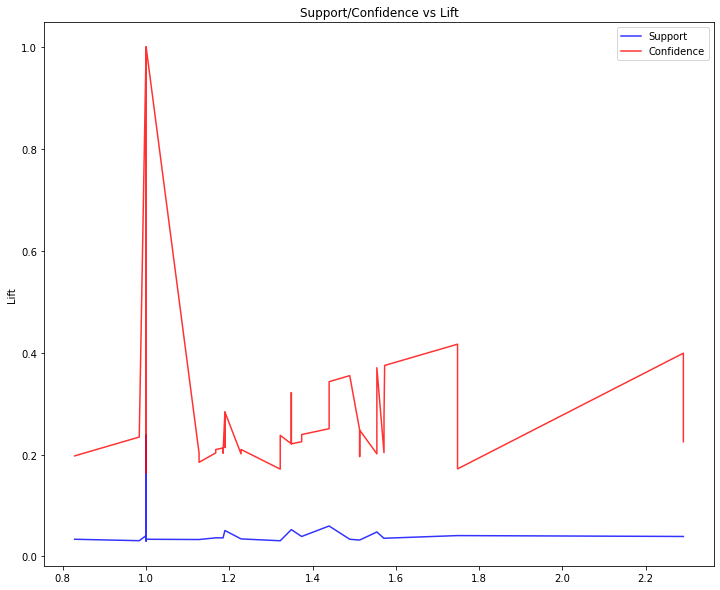

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
plt.plot(confidence['lift'], confidence['support'], alpha=0.8, color='blue', label="Support")
plt.plot(confidence['lift'], confidence['confidence'], alpha=0.8, color='red', label="Confidence")
plt.xlabel('')
plt.ylabel('Lift')
plt.title('Support/Confidence vs Lift')
plt.legend()
plt.show()